# 텍스트 전처리

#### 전처리 과정

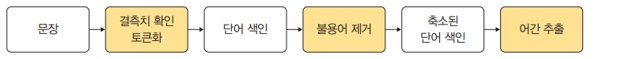

- 클렌징(cleansing)
- 토큰화(Tokenization)
- 필터링/ 스톱 워드(불용어) 제거 / 철자 수정
- 어간 추출(Stemming & Lemmatization)

## 2. 텍스트 토큰화(Text Tokenization)

- 문서에서 문장을 분리하는 **`문장 토큰화`**
- 문장에서 단어를 토큰으로 분리하는 **`단어 토큰화`**

### 문장 토큰화

- 문장의 마침표(.), 개행문자(\n), ? 등 문장의 마지막을 뜻하는 기호에 따라 분리
- 문장 분류(sentence segmentation)
- 코퍼스가 정제되지 않은 상태(문장 단위로 구분되어 있지 않는 경우)

- `!`와 `?`는 확실하게 문장 구분역할을 하나 `.`는 경우에 따라 문장을 구분하지 못하는 경우가 있음
- 예1.
```python
'''IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서
aaa@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.'''
```- 예2.
```python
"Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year."
```

- 정규 표현식에 따른 문장 토큰화
- NLTK의 **`sent_tokenize` API**를 많이 사용
- 단어사전과 같이 참조가 필요한 데이터 세트는 인터넷으로 다운로드 가능
    - 예. nltk.download('punkt') : 마침표, 개행문자 등의 데이터 세트 다운로드

**예. 마침표, 개행문자 등의 데이터세트 다운로드 및 문장 토큰화**

### 단어 토큰화

- 문장을 단어로 토큰화
- 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리
- 정규표현식을 이용해 다양한 토큰화 수행
- Bag of Word와 같이 단어의 순서가 중요하지 않은 경우는 문장 토큰화를 수행하지 않고 단어 토큰화만 사용해도 충분함
- 문장 토큰화는 각 문장이 가지는 시맨틱적 의미가 중요한 요소로 사용될 때 이용
- 단어 토큰화를 위해 NLTK의 **`word_tokenize` API** 사용

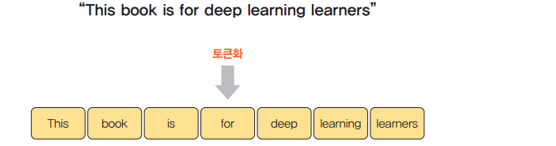

### 아포스트로피(')가 있는 문장에 대한 단어 토큰화

- NLTK의 WordPunctTokenizer를 이용

### 예. 문장 토큰화와 단어 토큰화

참고. 케라스의 text_to_word_sequence를 이용한 토큰화

```python
from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence = "It's nothing that you don't already know except most people aren't aware of how their inner world works."

words = text_to_word_sequence(sentence)
print(words)
```

- 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거함
- 아포스트로피를 보존함

### 토큰화에서 고려할 사항

1. 구두점이나 특수 문자를 단순 제외해서는 안된다
- 마침표(`.`)가 문장의 경계를 구분할 경우
- 단어 자체에 구두점을 가지고 있는 경우 : 예. Ph.D,  AT&T
- 특수문자의 `$`나 `/` : $45.55,  01/02/06 날짜
- 숫자 사이에 `,` : 123,456,789

2. 줄임말과 단어 내에 띄어쓰기가 있는 경우
- 영어의 아포스트로피(') : 예. what're -> what are,  we're -> we are (re를 접어라고 함)
- 하나의 단어인데 중간에 띄어쓰기가 있는 경우는 하나의 토큰으로 구분해야 함
    - 예. rock 'n' roll

### 표준 토큰화 예 : Penn Treebank Tokenization 규칙

- 규칙1. 하이푼(-)으로 구성된 단어는 하나로 유지한다
- 규칙2. dosen't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리한다

### 한글 토큰화

#### 한국어 문장 토큰화
- KSS(Korean Sentence Splitter)
   - 박상길 개발
   - https://github.com/hyunwoongko/kss

- KoNLPy에서 제공하는 한글 형태소 분석기를 이용

#### 한국어 단어 토큰화

### 한국어에서 토큰화의 어려움

**1. 교착어 특성**
- 다양한 조사가 띄어쓰기 없이 바로 붙어 있어 다른 단어로 보임(조사 분리 필요)
   - 예. 그(he/him) : 그가, 그에게, 그를, 그와, 그는
- 형태소(morpheme) : 뜻을 가진 가장 작은 말의 단위
   - 자립 형태소 : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소
       - 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사
       - 그 자체로 단어가 됨
   - 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소
       - 접사, 어미, 조사, 어간
   - 예. 나래가 책을 읽었다
       - 자립형태소 : 나래, 책
       - 의존형태소 : -가, -을, 읽-, -었, -다

**2. 띄어쓰기가 영어보다 잘 지켜지지 않음**
- 한국어는 띄어쓰기가 지켜지지 않아도 글을 쉽게 이해할 수 있는 언어
- 띄어쓰기 보편화 : 1933년 한글맞춤법통일안
- 한국어 모아쓰기 방식, 영어는 풀어쓰기 방식
- 예.
    - 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.
    -2) Tobeornottobethatisthequestion

### 품사 태깅(part-of-speech tagging)

- 단어는 품사에 따라서 의미가 달라짐
    - 영어 'fly' : 동사-'날다', 명사-'파리'
    - 한국어 '못' : 명사-'망치를 사용해 목재 따위를 고정하는 물건', 부사-'동작 동사를 할 수 없다는 의미'
- 품사태깅 : 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지 구분하는 작업

#### 영어 품사 태깅
- nltk : Penn Treebank POS Tags 기준으로 품사 태깅
    - PRP : 인칭대명사
    - VBP : 동사
    - RB : 부사
    - VBG : 현재부사
    - IN : 전치사
    - NNP : 고유명사
    - NNS : 복수형명사
    - CC : 접속사
    - DT : 관사

#### 한국어 품사 태깅

- 한국어 단어 토큰화
- KoNLPy의 형태소 분석기
    - Okt(Open Korea Text)
    - 메캅(Mecab)
    - 코모란(Komoran)
    - 한나눔(Hannanum)
    - 꼬꼬마(Kkma)

- 형태소 분석기 메서드
    - morphs : 형태소 추출
    - pos : 품사 태깅
    - nouns : 명사 추출

**n-gram**

## 3. 정제와 정규화

- 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거    
- 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어줌

- 토큰화 작업에 방해가 되는 부분들을 배제시키기 위해 토큰화 작업 전과 후에 진행
   1. 규칙에 기반한 표기가 다른 단어들 통합
       - USA -> US
       - uh-huh -> uhhuh
   2. 대소문자 통합 : 소문자로 변환
   3. 불필요한 단어의 제거
       - 등장 빈도가 적은 단어
       - 길이가 짧은 단어 : 길이가 2-3이하인 단어 제거

## 4. Stopwords 제거

- 불용어 제거
- 분석에 큰 의미가 없는 단어 제거
    - is, the, a, will 등 필수 문법 요소이지만 문맥적으로 큰 의미가 없는 단어
- 언어별 스톱 워드가 목록화되어 있음
    - NLTK의 **`'stopwords'`** 다운로드

**영어의 불용어 목록**

**예. 불용어 제거**

## 5. Stemming과 Lemmatization

- 문법적 또는 의미적으로 변화하는 **`단어의 원형을 찾는 작업`**
- 뿌리 단어를 찾아 단어의 개수를 줄임
- 영어의 경우
    - be동사 : am, ar, is
    - 과거/현재, 3인칭 단수 여부, 진행형 등은 원래 단어가 변형된 것
        - 예. work : worked, working, works ...    

#### 단어의 원형을 찾아가는 방식
- 단어의 형태학(morphology)적 파싱을 진행
- 형태소의 종류
    - 어간(stem) : 단어의 의미를 담고 있는 단어의 핵심 부분
    - 접사(affix) : 단어에 추가적인 의미를 주는 부분
        - 예. cats : cat(어간) + -s(접사)
- Stemming(어간 추출)과 Lemmatization(표제어 추출)
    - 표제어 추출이 어간 추출 보다 더 정교하며 의미론적 기반에서 단어의 원형을 찾음
    - 표제어 추출이 어간 추출 보다 변환에 더 오랜 시간을 필요로 함

### 1) Stemming(어간 추출)

- 형태학적 분석을 단순화한 버전
- 정해진 규칙만 보고 어미를 자르는 어림짐작의 작업
- 원형 단어로 변환시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음
- NLTK의 Stemmer : Porter, Lancaster, Snowball Stemmer

- NLTK의 **`LancasterStemmer`** 또는 **`PorterStemmer`** API를 이용
    - 진행형, 3인칭 단수, 과거형에 따른 동사, 비교, 최상에 따른 형용사 변화에 대한 더 단순한 원형 단어를 찾아 줌   
    

- stemming 단계    
    1. LancasterStemmer() 객체 생성
    2. stem('원하는단어') 메서드 호출

#### 랭커스터 알고리즘(LancasterStemmer)

#### 포터 알고리즘(PorterStemmer)

=> 랭커스터 알고리즘이 포터 알고리즘에 비해 단어 원형을 알아볼 수 없을 정도로 축소 시키므로, 데이터셋을 축소시켜야 하는 특정 상황에서 더 유용함

문제1. 다음 문장을 nltk의 PorterStemmer 추출 방식을 사용하여 단어 토큰화를 진행해보시오.
```python
sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
```

문제2. 다음 단어들을 nltk의 두 가지 어간 추출 방식을 사용하여 단어 토큰화를 수행하고 그 결과를 비교하시오.```python
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
```."

=> 어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, Porter 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택

### 2) Lemmatization(표제어 추출)

- Lemma : 표제어, 기본 사전형 단어
- 표제어 추출은 표제어를 찾아가는 과정
- 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아 줌
- 어간 추출보다 성능이 더 좋음
- 품사와 같은 문법 뿐만아니라 문장 내에서 단어 의미도 고려함
- 어간 추출보다 시간이 더 걸림
- NLTK의 Lemmatizer : WordNetLemmatizer    

#### **`WordNetLemmatizer`** API를 이용한 Lemmatization

- 단어의 품사 정보를 알면 더 정확한 결과를 얻을 수 있음

### 3) 한국어 어간 추출

- 한국어는 5언 9품사의 구조
  - 체언 : 명사, 대명사, 수사
  - 수식언 : 관형사, 부사
  - 관계언 : 조사
  - 독립언 : 감탄사
  - 용언 : 동사, 형용사
    - 동사와 형용사는 어간(stem)과 어미(ending)의 결합으로 구성되므로 용언이라고 언급할 경우 동사와 형용사를 포함하여 언급한 것임

#### 활용(conjugation)
- 활용이란 용언의 어간(stem)이 어미(ending)을 가지는 일
- 한국어, 인도유럽어에서 볼 수 있는 언어적 특징의 통칭적인 개념
- 어간(stem) : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분
    - 어간의 모양이 바뀔 수 있음(예. 긋다, 긋고, 그어서, 그어라)
- 어미(ending) : 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분, 여러 문법적 기능을 수행
- 활용의 구분
    - 규칙활용
    - 불규칙활용

**규칙 활용**
- 어간이 어미를 취할 때 어간의 모습이 일정한 경우
- 어간과 어미를 합칠 때 어간의 형태가 바뀌지 않는 경우
- 예. 잡다 : 잡(어간) + 다(어미)

**불규칙 활용**
- 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우
- 어간의 형식이 달라지는 경우
    - 예. 듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-’
- 특수한 어미를 취하는 경우
    - 예. 오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러 
- https://namu.wiki/w/한국어/불규칙%20활용

-------------